## Breast_Cancer_Survival

##### Breast Cancer survival
Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


#### Attribute Information:
1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year

#### The objective is to predict whether the patient will survive after 5 years or not based upon the patient’s age, year of operation and the number of positive axillary nodes.


In [37]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from sklearn import metrics
from subprocess import check_output

In [3]:
df = pd.read_csv("C:\\Users\\Yash\\Python my work\\My work\\Project Data\\Breast_cancer_survival.csv")
df

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


### Pre_processing

In [4]:
# changed status from 1&2 to 1&0 respectively for patients survived & not 
df["Status"]=df["Status"].apply(lambda x: 1 if x==1 else 0)

C:\Ankita\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Pair Plot')

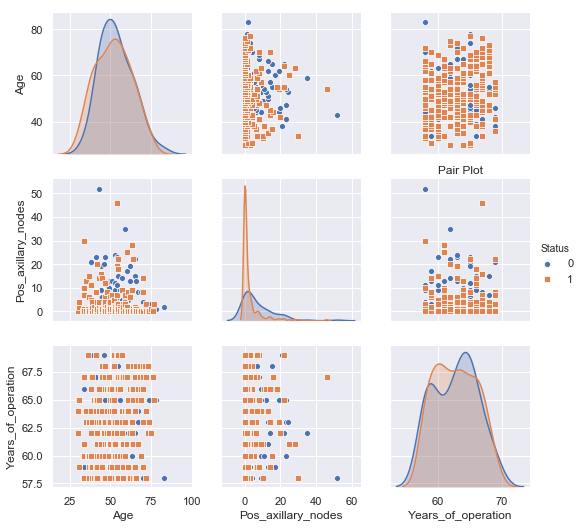

In [5]:
sns.pairplot(df[["Age","Pos_axillary_nodes","Years_of_operation","Status"]],vars = ["Age","Pos_axillary_nodes","Years_of_operation"],hue="Status", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

Text(0.5, 1.0, 'Correlation between features')

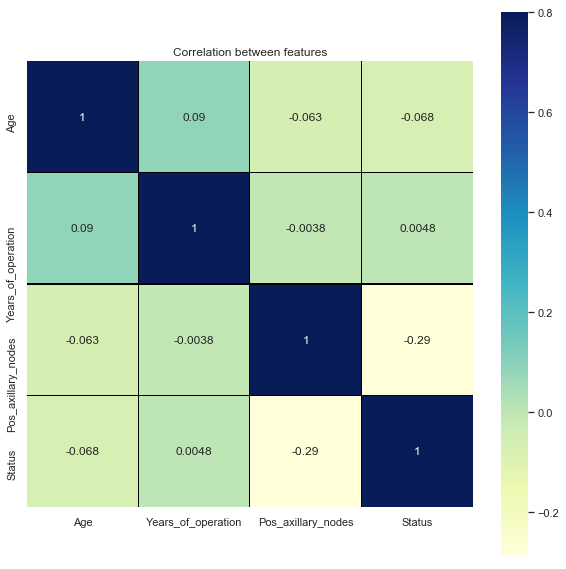

In [6]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

## Logistic Regression

In [7]:
X=df.loc[:,df.columns!="Status"]
X.head()

,Age,Years_of_operation,Pos_axillary_nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4


In [8]:
y=df.Status

### Splitting X & y into training & test dataset

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(244, 3)
(244,)
(62, 3)
(62,)


### Building a Dummy Classifier to determine the baseline performance.

In [13]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
y_pred_test = clf.predict(X_test)

In [14]:
y_test.value_counts()

1    48
0    14
Name: Status, dtype: int64

In [15]:
pd.Series(y_pred_test).value_counts()

1    62
dtype: int64

#### From the output, we can observe that there are 4 patents survived and 14 died in the test dataset. However, our classifier predicts all cases as Survived (as it is the majority class).

### Evaluation matrics of this model

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_test))


0.7741935483870968


In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

   0   1
0  0  14
1  0  48


#### The accuracy of the model with dummy classifier is 77.41%,this may not be the best matrics so lets just calculate accuracy score with Logistic regression model.

### Logistic Regression model

In [18]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression().fit(X_train,y_train)
logreg

C:\Ankita\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_pred_train = logreg.predict(X_train)  

In [20]:
y_pred_test = logreg.predict(X_test)   

### Evaluation matrics for this model

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_test))


0.7419354838709677


In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

   0   1
0  3  11
1  5  43


In [23]:
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                   3                  11
Actual Survived               5                  43


- 43+3=46 __correct prediction__ & 5+11=16 __false prediction__

__Adjusting Threshold__ for predicting Died or Survived.

Setting the threshold to __0.75__

In [24]:
pred1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print(accuracy_score(y_test,pred1))

0.7096774193548387


The accuracy have been __reduced__ significantly changing from __0.74 to 0.70__. Hence, 0.75 is __not a good threshold__ for our model. 

Setting the threshold to __0.25__

In [25]:
pred2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print(accuracy_score(y_test,pred2))

0.7419354838709677


The accuracy is 0.74 which is same Logistic regression model

## Linear Regression

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df)
df1 = scaler.transform(df)

C:\Ankita\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Ankita\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
df = pd.DataFrame(df1)
df.head()

,0,1,2,3
0,-2.082140,0.353584,-0.421592,0.6
1,-2.082140,-0.262921,-0.142959,0.6
2,-2.082140,0.661837,-0.560909,0.6
3,-1.989426,-1.187680,-0.282275,0.6
4,-1.989426,0.661837,-0.003642,0.6


In [31]:
df.columns = ['Age','Years_of_operation','Pos_axillary_nodes','Status']
df.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,-2.082140,0.353584,-0.421592,0.6
1,-2.082140,-0.262921,-0.142959,0.6
2,-2.082140,0.661837,-0.560909,0.6
3,-1.989426,-1.187680,-0.282275,0.6
4,-1.989426,0.661837,-0.003642,0.6


In [32]:
feature_cols = ['Age','Years_of_operation','Pos_axillary_nodes']                # create a Python list of feature names
X = df[feature_cols] 

In [33]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(306, 3)


In [34]:
y = df.Status
y.head()

0    0.6
1    0.6
2    0.6
3    0.6
4    0.6
Name: Status, dtype: float64

### Splitting X & y in train & test dataset

In [35]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [39]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (244, 3)
y_train shape:  (244,)

Test cases as below
X_test shape:  (62, 3)
y_test shape:  (62,)


In [40]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train) 
y_pred_test = linreg.predict(X_test) 
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print(RMSE_test)

0.9342924980836543


- The Model accuracy is 93.42%

### Linear regression without gridsearcCV

In [44]:
X = df[feature_cols]  
y = df.Status
linreg = linear_reg(X,y)

In [45]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: -0.027933737889539945
Coefficients: [-0.0289452   0.0156163  -0.31261227]


In [46]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)  

In [47]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.027933737889539945
Age -0.028945201013146505
Years_of_operation 0.01561630498792068
Pos_axillary_nodes -0.31261226509853673


## Model Evaluation

In [48]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [49]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.3580831342873312
RMSE for test set is 0.9342924980836543
